In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics

In [3]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [4]:
df_white = pd.read_csv("winequality-white.csv")
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


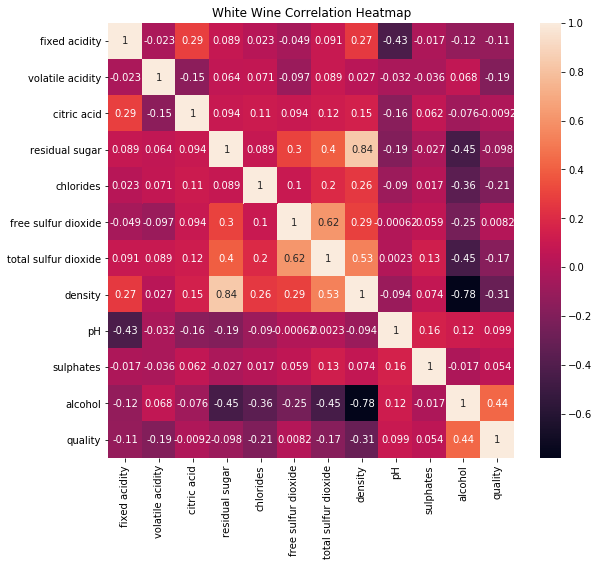

In [8]:
plt.figure(figsize = (20,8))
plt.subplot(1, 2, 2)
sns.heatmap(df_white.corr(), annot=True)
plt.title('White Wine Correlation Heatmap')
plt.show()

In [7]:
columns = df_white.columns
columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Sklearn (all features) Multiclass

In [123]:
train, test = train_test_split(df_white, stratify=df_white["quality"], train_size=0.2, random_state=201)
train.head(60)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1141,6.2,0.360,0.14,8.90,0.036,38.0,155.0,0.99622,3.27,0.50,9.40,5
1602,6.6,0.270,0.32,1.30,0.044,18.0,93.0,0.99044,3.11,0.56,12.25,5
578,6.4,0.260,0.22,5.10,0.037,23.0,131.0,0.99440,3.29,0.32,10.10,5
4249,7.1,0.120,0.30,3.10,0.018,15.0,37.0,0.99004,3.02,0.52,11.90,7
4454,6.1,0.300,0.30,2.10,0.031,50.0,163.0,0.98950,3.39,0.43,12.70,7
3066,6.5,0.430,0.28,11.25,0.032,31.0,87.0,0.99220,3.02,0.38,12.40,6
1886,6.8,0.280,0.17,13.90,0.047,49.0,162.0,0.99830,3.21,0.51,9.00,6
4277,6.6,0.260,0.21,2.90,0.026,48.0,126.0,0.99089,3.22,0.38,11.30,7
4083,7.2,0.320,0.33,1.40,0.029,29.0,109.0,0.99020,3.15,0.51,12.80,7
1643,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.90,6


In [124]:
model = LogisticRegression(max_iter=10**10)
model.fit(train[["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
       "pH", "sulphates", "alcohol"]], train["quality"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000000000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
test.copy()
test.loc[:, ('predicted')] = model.predict(test[["fixed acidity", "volatile acidity", "citric acid", "residual sugar",
       "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
       "pH", "sulphates", "alcohol"]])
test.head(60)

C:\Users\calix\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\calix\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,predicted
3857,7.9,0.220,0.38,8.00,0.043,46.0,152.0,0.99340,3.12,0.32,11.5,7,6
1540,6.0,0.280,0.29,19.30,0.051,36.0,174.0,0.99911,3.14,0.50,9.0,5,5
2683,6.3,0.270,0.37,7.90,0.047,58.0,215.0,0.99542,3.19,0.48,9.5,6,6
1983,6.9,0.240,0.33,12.50,0.046,47.0,153.0,0.99830,3.28,0.77,9.6,6,6
3866,7.1,0.210,0.37,2.40,0.026,23.0,100.0,0.99030,3.15,0.38,11.4,7,6
805,7.2,0.230,0.33,12.70,0.049,50.0,183.0,0.99870,3.41,0.40,9.8,5,6
2353,6.2,0.300,0.20,6.60,0.045,42.0,170.0,0.99440,3.36,0.45,10.4,6,6
1779,6.4,0.340,0.23,6.30,0.039,37.0,143.0,0.99440,3.19,0.65,10.0,6,6
2671,6.6,0.260,0.27,1.50,0.040,19.0,114.0,0.99295,3.36,0.62,10.5,6,6
79,7.1,0.530,0.24,0.80,0.029,29.0,86.0,0.99300,3.16,0.32,9.1,4,5


In [128]:
coef = np.vstack((model.coef_.T, model.intercept_))
scores = sigmoid(test.iloc[:, :12] @ coef)
scores.set_axis(model.classes_, axis=1).head(60)

,3,4,5,6,7,8,9
3857,2.152976e-04,1.000000,1.0,1.000000,1.628331e-14,2.762359e-22,7.771300e-09
1540,1.162550e-03,1.000000,1.0,0.999998,1.089938e-09,5.262661e-15,1.341391e-08
2683,2.782065e-03,1.000000,1.0,1.000000,1.738744e-12,3.707546e-19,2.030462e-08
1983,1.295037e-03,1.000000,1.0,1.000000,4.676329e-12,5.055897e-19,1.298700e-08
3866,2.768337e-05,1.000000,1.0,1.000000,1.077475e-14,1.234947e-22,7.798754e-08
805,5.164468e-03,0.999999,1.0,0.999997,9.245973e-10,2.768711e-15,8.052205e-08
2353,2.764372e-04,1.000000,1.0,1.000000,2.942822e-12,6.295606e-19,7.363374e-08
1779,3.885809e-04,1.000000,1.0,1.000000,2.549998e-12,2.976181e-19,9.939265e-08
2671,1.166806e-04,1.000000,1.0,0.999999,2.377874e-12,1.793492e-19,5.643570e-07
79,9.305225e-03,0.999994,1.0,0.999872,2.997984e-08,5.545630e-13,7.274165e-05
